In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

residuals=[]

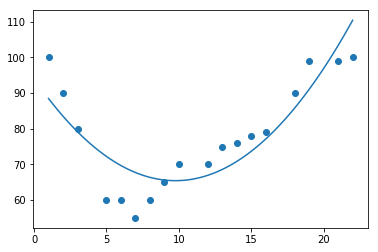

RSS = 949.787725757075


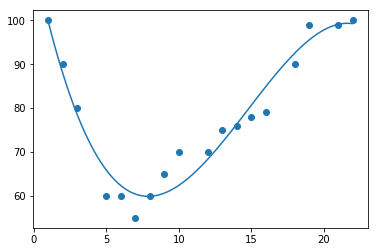

RSS = 224.51510645562965


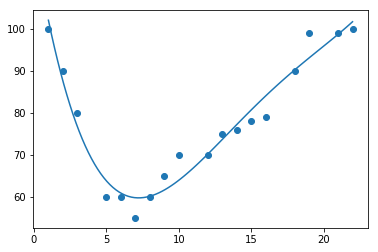

RSS = 181.07083086725373


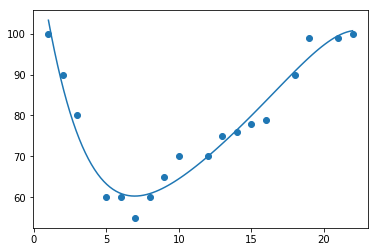

RSS = 170.62127091143466


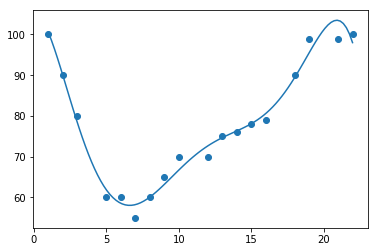

RSS = 79.50917525899176


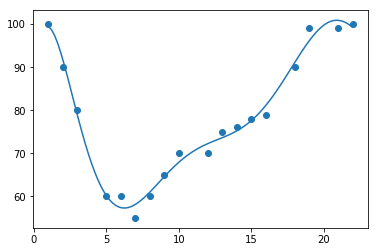

RSS = 52.300808712095375


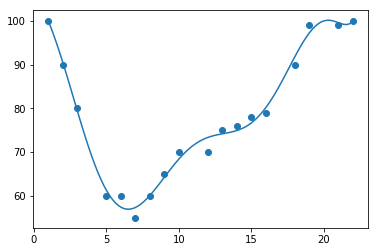

RSS = 40.23711603640152


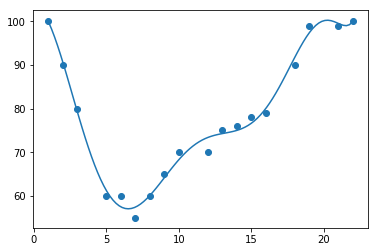

RSS = 40.09798864582169


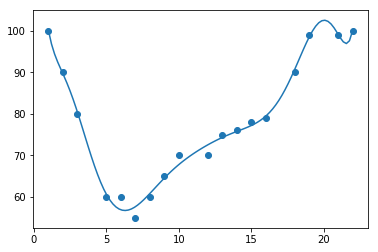

RSS = 31.66849851337352


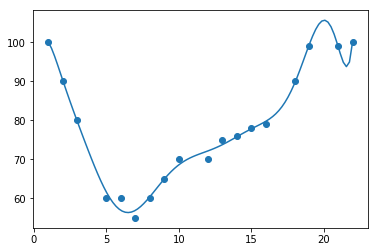

RSS = 25.191160302913534


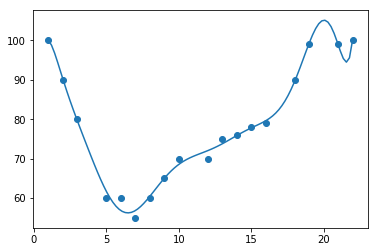

RSS = 25.109187195390554


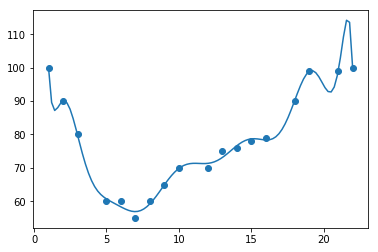

RSS = 14.3173823288884


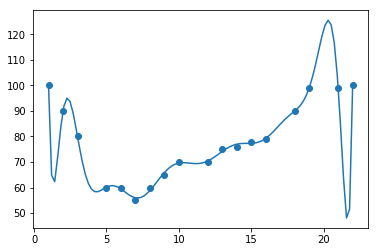

RSS = 5.908587476948571


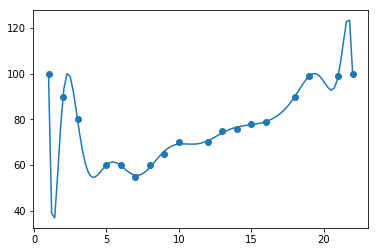

RSS = 5.010026521289507


In [2]:
for power in range(2, 16):
    mymodel = np.poly1d(np.polyfit(x, y, power))

    myline = np.linspace(1, 22, 100)

    plt.scatter(x, y)
    plt.plot(myline, mymodel(myline))
    plt.show() 

    y_model = mymodel(x)

    # Compute the RSS value for this parameterization of the model
    rss = np.sum(np.square(y_model - y))
    print("RSS = {}".format(rss))

    residuals.append(rss)

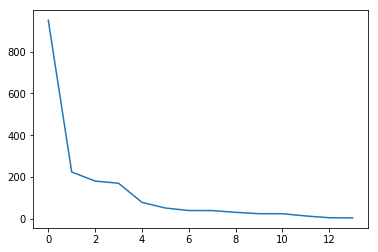

In [3]:
#print(residuals)
plt.plot(residuals)
plt.show()

So with increasing the degree of polynomial its clear that the value of its residual sum of square decreased 

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

sales = pd.read_csv('kc_house_data.csv')
x = sales['sqft_living']
y = sales['price']


X_train, X_test_valid, y_train, y_test_valid = train_test_split(x           , y           , test_size=0.3)
X_test , X_valid     , y_test , y_valid      = train_test_split(X_test_valid, y_test_valid, test_size=0.5)

residuals=[]

In [5]:
print(len(X_train),len(X_test_valid))
print(len(X_test),len(X_valid))

15129 6484
3242 3242


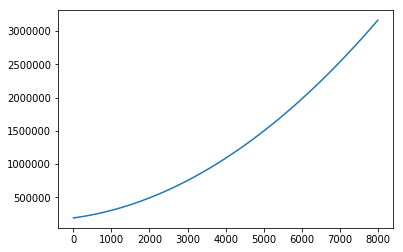

Degree = 2 , RSS = 218636600449307.88


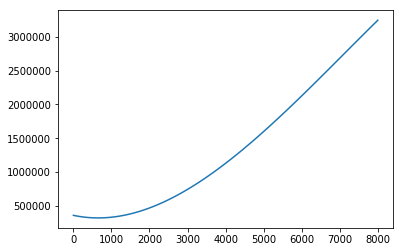

Degree = 3 , RSS = 222067452932924.12


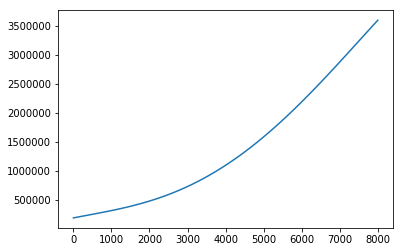

Degree = 4 , RSS = 220005332623578.66


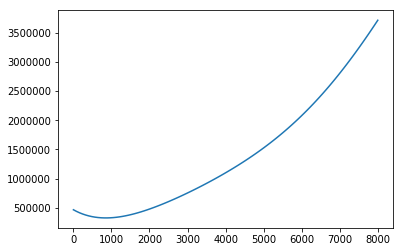

Degree = 5 , RSS = 216358679540196.22


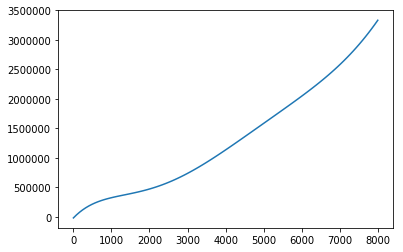

Degree = 6 , RSS = 214142673062386.75


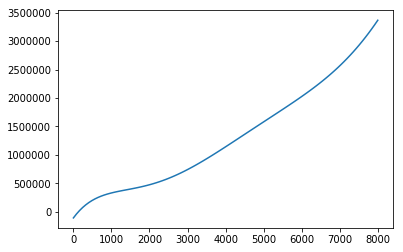

Degree = 7 , RSS = 213668557900713.5


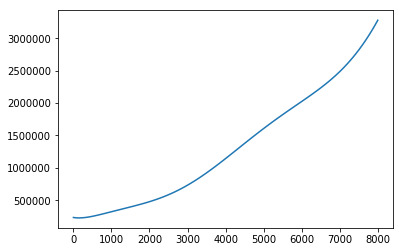

Degree = 8 , RSS = 213090914703182.56


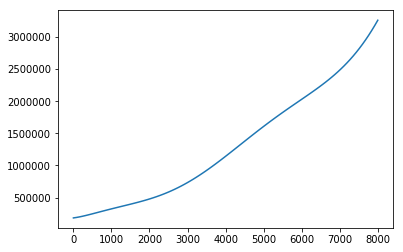

Degree = 9 , RSS = 213159197095069.7


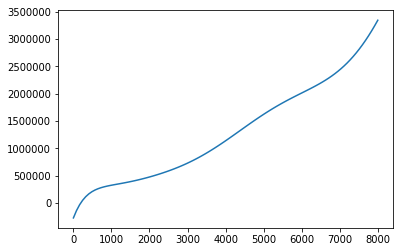

Degree = 10 , RSS = 213201199340969.8


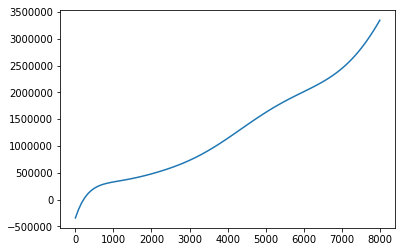

Degree = 11 , RSS = 213141291011150.72


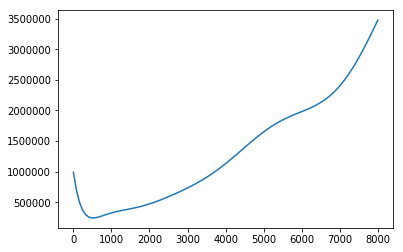

Degree = 12 , RSS = 212933741280435.38


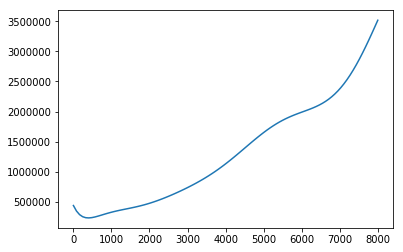

Degree = 13 , RSS = 213136562225172.0


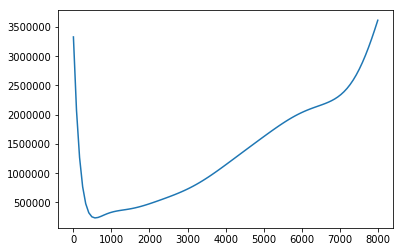

Degree = 14 , RSS = 214704971210586.3


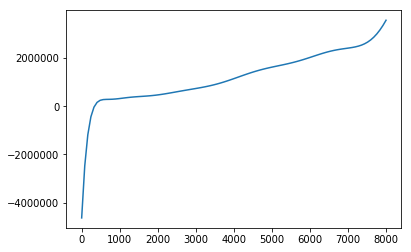

Degree = 15 , RSS = 216919296946143.5


In [6]:
for degree in range(2, 16):
    mymodel = np.poly1d(np.polyfit(X_train, y_train, degree))

    myline = np.linspace(1, 8000, 100)

    #plt.scatter(X_train, y_train)
    plt.plot(myline, mymodel(myline))
    plt.show() 

    # Compute the RSS value for this parameterization of the model on VALIDATION data
    y_model = mymodel(X_valid)
    rss = np.sum(np.square(y_model - y_valid))
    print("Degree = {} ,".format(degree) ,"RSS = {}".format(rss))

    residuals.append(rss)

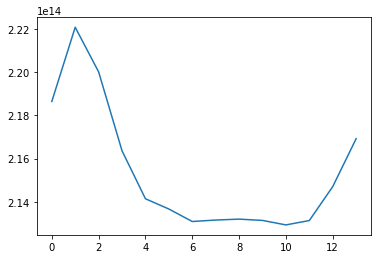

In [7]:
#print(residuals)
plt.plot(residuals)
plt.show()

So it can be clearly seen that least value would be reached at 6 degree of polynomial 

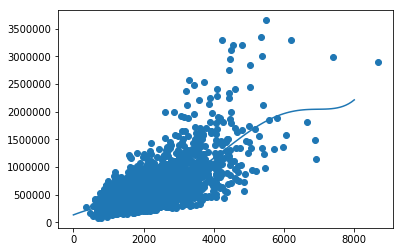

So the RSS on TEST data for the model with the degree (6) selected from Validation data would be = 203734609851460.44


In [9]:
degree=6
mymodel = np.poly1d(np.polyfit(X_test, y_test, degree))
myline = np.linspace(1, 8000, 100)

plt.scatter(X_test, y_test)
plt.plot(myline, mymodel(myline))
plt.show() 

# Compute the RSS value for this parameterization of the model on TEST data
y_model = mymodel(X_test)
rss = np.sum(np.square(y_model - y_test))
print("So the RSS on TEST data for the model with the degree ({}) selected from Validation data would be = {}".format(degree, rss))
